# Predict car prices based on Used Car Prices Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing the dataset

In [2]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### handling missing values

In [4]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#removing rows with the value of price missing
df.dropna(subset=["price"],axis=0,inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
#replacing missing values with the mean
df['normalized-losses'] = df['normalized-losses'].astype("float")
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].mean())

df['bore'] = df['bore'].astype("float")
df['bore'] = df['bore'].fillna(df['bore'].mean())

df['stroke'] = df['stroke'].astype("float")
df['stroke'] = df['stroke'].fillna(df['stroke'].mean())

df['horsepower'] = df['horsepower'].astype("float")
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

df['peak-rpm'] = df['peak-rpm'].astype("float")
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].mean())


In [9]:
#replace missing values of categorical variable
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,"four",inplace=True)

In [10]:
#null values have been replaced/removed successfully
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### changing the data type

In [11]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### encoding attributes

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['fuel-type']= label_encoder.fit_transform(df['fuel-type'])
df['aspiration']= label_encoder.fit_transform(df['aspiration'])

### checking the correaltion between price and numerical variables

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


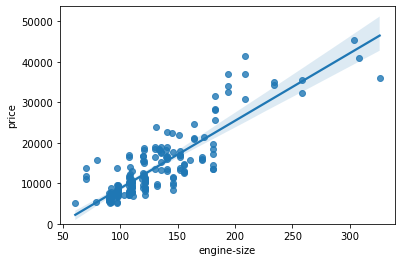

In [13]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
df[["engine-size", "price"]].corr()
#there is a a positive relationship between engine size and price. As engine size goes up, price increase.
#correlation between engine size and price is 0.872

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


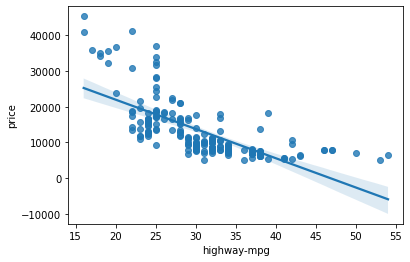

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)
df[['highway-mpg', 'price']].corr()
#there is a negative correlation(-7.05) between highway-mpg and price. 

In [15]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,0.196735,-0.054615,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075790,0.279719,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,0.101546,-0.006911,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999
fuel-type,0.196735,0.101546,1.000000,-0.408228,-0.307237,-0.211187,-0.244356,-0.281578,-0.221046,-0.070779,-0.054435,-0.241033,-0.985231,0.168977,0.475759,-0.265676,-0.198690,-0.110326
aspiration,-0.054615,-0.006911,-0.408228,1.000000,0.256889,0.230085,0.305732,0.090336,0.321955,0.110040,0.227782,0.218190,0.307522,0.251235,-0.189982,-0.189237,-0.241851,0.179578
wheel-base,-0.535987,-0.056661,-0.307237,0.256889,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371250,-0.360233,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,-0.211187,0.230085,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579731,-0.286035,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,-0.244356,0.305732,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.615006,-0.245852,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,-0.281578,0.090336,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086941,-0.309913,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,-0.221046,0.321955,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.757994,-0.279350,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,-0.070779,0.110040,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822649,-0.256753,-0.650546,-0.679571,0.872335


### checking the correaltion between price and categorical variables

<AxesSubplot:xlabel='body-style', ylabel='price'>

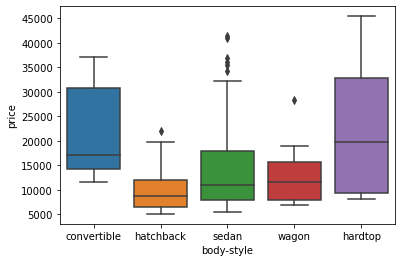

In [16]:
sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

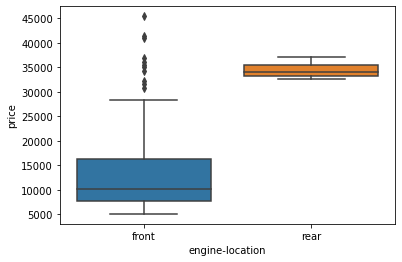

In [17]:
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

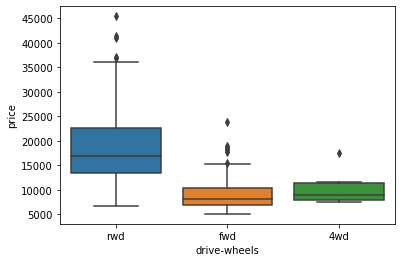

In [18]:
sns.boxplot(x="drive-wheels", y="price", data=df)

### Grouping

In [19]:
df_group = df[['drive-wheels','body-style','price']]
group = df_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [20]:
pivot = group.pivot(index='drive-wheels',columns='body-style').fillna(0)
pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

From the above correaltion table and grouping analysis, the attributes taken into consideration while calculating price are-
Length, Width, Curb-weight, Engine-size, Horsepower, City-mpg, Highway-mpg, Wheel-base, Bore and drive-wheels

### Developing the model using multiple regression

In [21]:
V = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [23]:
lm.fit(V, df['price'])

LinearRegression()

In [24]:
print(lm.intercept_)
print(lm.coef_)

-15824.038208234473
[53.61042729  4.70886444 81.47225667 36.39637823]


**Price** = -15824.0382 + 53.610x**horsepower** + 4.71x**curb-weight** + 81.472x**engine-size** + 36.396x**highway-mpg**

C:\Users\namra\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\namra\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


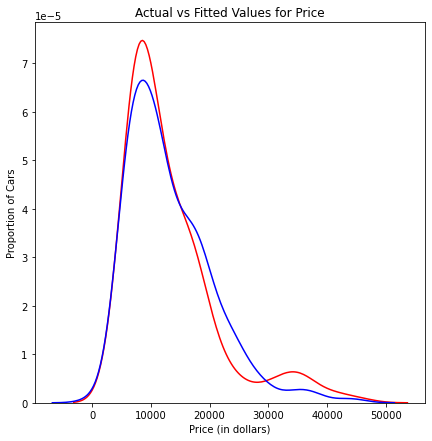

In [25]:
Yhat = lm.predict(V)
plt.figure(figsize=(7,7))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

### value of R2 for the model

In [26]:
lm.score(V, df['price'])

0.8094130135602673

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'], lm.predict(V))

11976801.681229591

### making predictions

In [28]:
#Price = -15824.0382 + 53.610xhorsepower + 4.71xcurb-weight + 81.472xengine-size + 36.396xhighway-mpg
def predict_y(hp, cw, es, mpg):
    price = -15824.0382 + 53.610*hp + 4.71*cw + 81.472*es + 36.396*mpg
    return price

In [29]:
predict_y(111, 2548, 130, 27)

13701.803799999998

In [30]:
predict_y(120,6738, 150, 89)

37805.1858